In [57]:
# Required Libraries
import pandas as pd
import json
import pymongo
import certifi
from matplotlib import pyplot

Connection Methodology Derived from Professor Theodore Spence: 
https://github.com/tspence/data-analysis-class-resources/blob/main/jupyter/Basics%20of%20Loading%20Data.ipynb

In [67]:
# I realize this is the second most scuffed path after putting it right in the same repository
with open('C:\\Users\\JaredM\\Downloads\\secrets.json') as f:
    data = json.load(f)

    connection_string = data['mongodb']

# Verify connection string was fetched
# print(f"My secret key is {len(connection_string)} characters in length.")

In [68]:
# Connect to Database
client = pymongo.MongoClient(connection_string, tlsCAFile=certifi.where())

# Fetch Database
movie_database = client['Movies']

# Fetch Collections In Database
collections = movie_database.list_collection_names()

# Verify collections found
# print(f"Using MongoDB version {client.server_info()['version']}.")
# print(f"This database has the collections {collections}")

In [69]:
# Load imdb collection. RAW, no outlier filter!
cursor = movie_database["imdb"].find()

# Convert this information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# Cleaning Data
imdb.release_date = pd.to_datetime(imdb.release_date, errors='coerce')
imdb.budget = pd.to_numeric(imdb.budget, errors='coerce')
imdb.runtime = pd.to_numeric(imdb.runtime, errors='coerce')

# Check data
# imdb.head()

<function matplotlib.pyplot.show(close=None, block=None)>

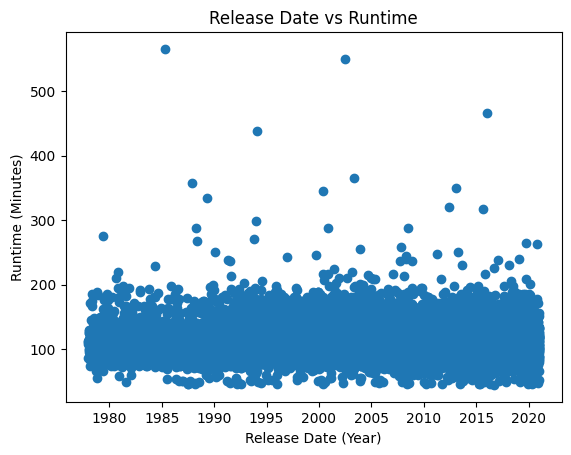

In [70]:
# Plot Runtime Vs Release Date
pyplot.title('Release Date vs Runtime')
pyplot.xlabel('Release Date (Year)')
pyplot.ylabel('Runtime (Minutes)')
pyplot.scatter(imdb.release_date, imdb.runtime)
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

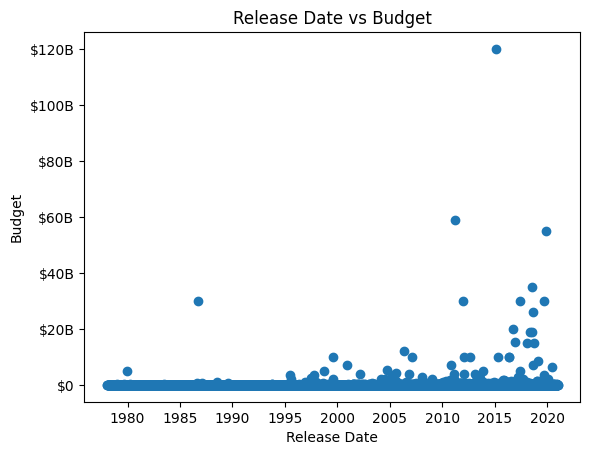

In [71]:
# Plotting Budget vs Release Date

# Formats large numbers of currency into shorthand
# Derived from Professor Theodore Spence: https://github.com/tspence/data-analysis-class-resources/blob/main/jupyter/Basics%20of%20Plotting.ipynb
def format_currency(amount, _):
    if amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

pyplot.title('Release Date vs Budget')
pyplot.xlabel('Release Date')
pyplot.ylabel('Budget')
pyplot.scatter(imdb.release_date, imdb.budget)
pyplot.gca().yaxis.set_major_formatter(format_currency)
pyplot.show

Eyeballing Budgets > $40 Billion and Runtimes > 400 Minutes as outliers

In [ ]:
# Run to apply filters for identified outliers, then run Plot cells

# Query
query = {"budget": {"$lt": 40000000000}, "runtime": {"$lt": 400}}

# Load imdb collection with filters
cursor = movie_database["imdb"].find(query)

# Cleaning Data
imdb.release_date = pd.to_datetime(imdb.release_date, errors='coerce')
imdb.budget = pd.to_numeric(imdb.budget, errors='coerce')
imdb.runtime = pd.to_numeric(imdb.runtime, errors='coerce')
